In [1]:
import pandas as pd
import numpy as np

data_frame = pd.read_csv('./winemag-data-130k-v2.csv')
#编写数据摘要
data_frame.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# 编写数据摘要

In [2]:
data_frame.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# 统计标升属性的频数

In [3]:
data_frame['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [5]:
data_frame['province'].value_counts()

California     36247
Washington      8639
Bordeaux        5941
Tuscany         5897
Oregon          5373
               ...  
Egypt              1
Viile Timis        1
Muzla              1
Table wine         1
Imathia            1
Name: province, Length: 425, dtype: int64

In [6]:
data_frame['region_1'].value_counts()

Napa Valley                    4480
Columbia Valley (WA)           4124
Russian River Valley           3091
California                     2629
Paso Robles                    2350
                               ... 
Monterey County-Napa County       1
Catamarca                         1
Altos de Mendoza                  1
Napa-Sonoma-Marin                 1
Jujuy                             1
Name: region_1, Length: 1229, dtype: int64

In [7]:
data_frame['region_2'].value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [9]:
data_frame['taster_name'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [10]:
data_frame['variety'].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Caprettone                        1
Merseguera-Sauvignon Blanc        1
Thrapsathiri                      1
Schwartzriesling                  1
Gamza                             1
Name: variety, Length: 707, dtype: int64

In [11]:
data_frame['winery'].value_counts()

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Marqués de Chivé        1
Amuse Bouche            1
Foggy Bridge            1
Tribal                  1
Cyrus                   1
Name: winery, Length: 16757, dtype: int64

# 数值属性五数概括：

In [12]:
number_data = ['price', 'points']
data_frame[number_data].describe()

,price,points
count,120975.000000,129971.000000
mean,35.363389,88.447138
std,41.022218,3.039730
min,4.000000,80.000000
25%,17.000000,86.000000
50%,25.000000,88.000000
75%,42.000000,91.000000
max,3300.000000,100.000000


<AxesSubplot:>

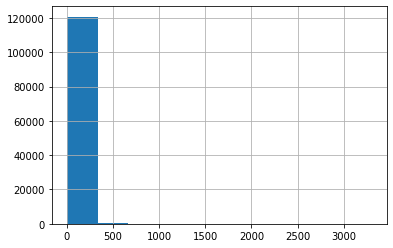

In [14]:
data_frame['price'].hist()

<AxesSubplot:>

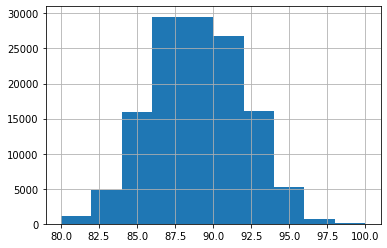

In [12]:
data_frame['points'].hist()

<Figure size 432x288 with 0 Axes>

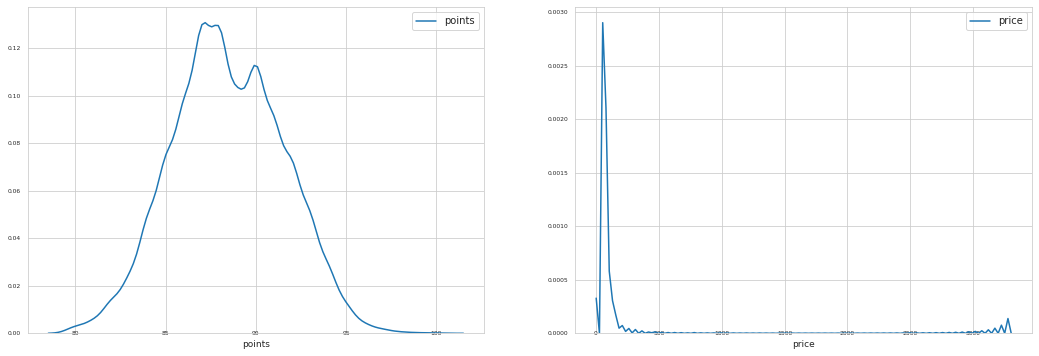

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_distribution(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,2,figsize=(18,6))

    for feature in features:
        i += 1
        plt.subplot(1,2,i)
        sns.kdeplot(df[feature], bw=0.5,label=feature)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()
features = ['points','price']
plot_feature_distribution(data_frame, features)

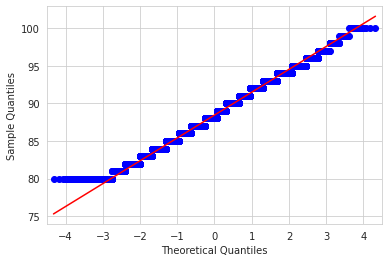

In [19]:
#绘制points的q-q图
import statsmodels.api as sm
import pylab

sm.qqplot(data_frame['points'], line='s')
pylab.show()

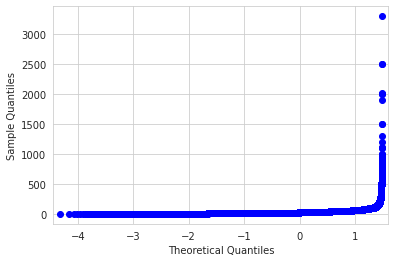

In [20]:
#绘制price的q-q图，不是一条直线所以不服从正态分布
sm.qqplot(data_frame['price'], line='s')
pylab.show()

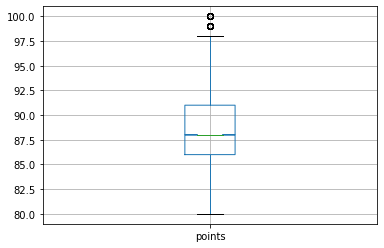

In [15]:
#绘制points的盒图
import matplotlib.pyplot as plt

data_frame['points'].plot(kind='box', notch=True, grid=True)
plt.show()

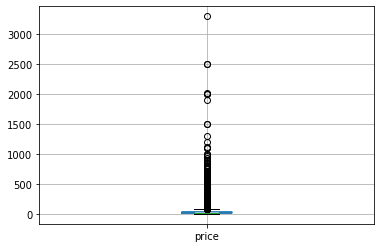

In [16]:
#绘制price的盒图，发现price的部分数据值较大
data_frame['price'].plot(kind='box', notch=True, grid=True)
plt.show()

# 缺失数据处理

In [17]:
data_frame.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [18]:
#直接删除缺失值
del_data_frame = data_frame.dropna()
del_data_frame.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


# 使用高频值来进行填充

In [19]:
from collections import Counter
from math import isnan

miss_features = ['country','designation','price','province','region_1','region_2','taster_name','taster_twitter_handle','variety']
fill_data_frame = data_frame

for col in miss_features:
    word_counts = Counter(fill_data_frame[col])
    top = word_counts.most_common(1)[0][0]
    if type(top) != str:
        if isnan(top):
            top = word_counts.most_common(2)[1][0]
    print(top, type(top))
    temp = fill_data_frame[col].fillna(top)
    fill_data_frame[col] = temp
fill_data_frame.head()


US <class 'str'>
Reserve <class 'str'>
20.0 <class 'float'>
California <class 'str'>
Napa Valley <class 'str'>
Central Coast <class 'str'>
Roger Voss <class 'str'>
@vossroger <class 'str'>
Pinot Noir <class 'str'>


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,20.0,Sicily & Sardinia,Etna,Central Coast,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Napa Valley,Central Coast,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Central Coast,Alexander Peartree,@vossroger,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# 通过属性相关关系进行填充

In [20]:
data_frame.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.005212
points,0.007124,1.000000,0.397211
price,0.005212,0.397211,1.000000


In [21]:
data_frame.corr('spearman')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.009378,0.005019
points,0.009378,1.000000,0.573772
price,0.005019,0.573772,1.000000
